# Part-1 GDP Analysis of the Indian States

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("ab40c054-5031-4376-b52e-9813e776f65e.csv")

# Part I-A:

# Remove the rows: '(%Growth over the previous year)' and 'GDSP-CURRENT PRICES ('In Crore)' for the year 2016-17

In [3]:
df_GDSP = df[df['Items  Description'].isin(['GSDP - CURRENT PRICES (` in Crore)','(% Growth over previous year)'])]
df_GDSP_1617=df_GDSP[df_GDSP['Duration'] == '2016-17']
df = df.drop(df_GDSP_1617.index, axis=0)

# Average Growth of states for the duration 2013-16 (%Growth over previous year)

In [4]:
df = df[df['Items  Description'] != 'GSDP - CURRENT PRICES (` in Crore)']
df = df[df['Duration'] != '2012-13']

In [5]:
df.loc['mean']= df.mean()

In [6]:
# Filling Missing Values
df.loc['mean', 'Items  Description'] = 'Avg Growth'
df.loc['mean', 'Duration'] = '2013-16'

In [7]:
# Transpose the data frame(Columns into rows)
df = pd.melt(df, id_vars=["Items  Description","Duration"],var_name="State", value_name="GDSP")

In [8]:
df = df[df['Items  Description'] =='Avg Growth']

In [9]:
# Removing Union Territories and States
df = df[-df['State'].isin(['Puducherry','Delhi','Chandigarh','All_India GDP','Andaman & Nicobar Islands','West Bengal1'])]

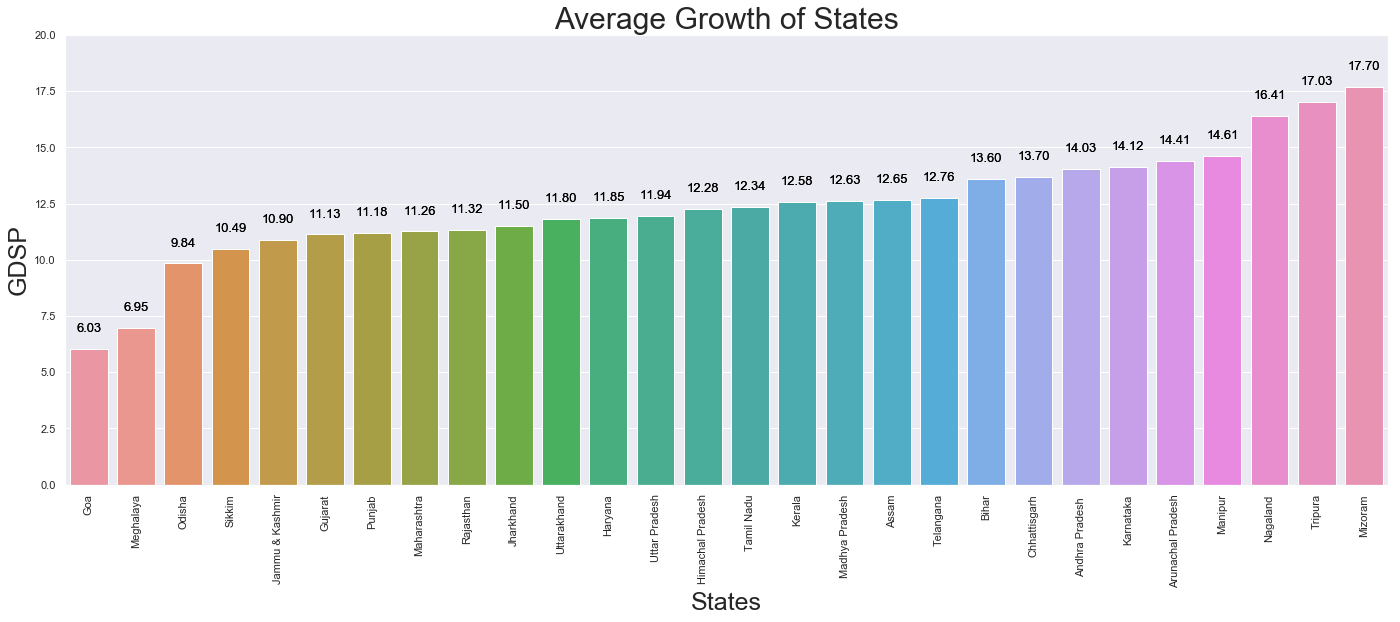

In [10]:
sns.set(rc={'figure.figsize':(23.7,8.27)})
plt.xticks(rotation=90)
result=df.sort_values('GDSP')
sns.barplot(x="State", y="GDSP", data=result);

#---------------------------------------#

#sns.set(rc={'figure.figsize':(20.7,4.27)})
plt.xticks(rotation=90)
g=sns.barplot(x="State", y="GDSP", data=result)
plt.title('Average Growth of States',fontsize=30)
plt.xlabel('States',fontsize=25)
plt.ylabel('GDSP',fontsize=25)
ax=g

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,20)

# Q1. Which states have been growing consitently fast, and which ones have been struggling?

Answer: 
 - Nagaland, Tripura and Mizoram are fast growing states
 
 - Goa and Meghalaya are struggling in growth



# Q2. Curiosity Exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

Home State: 

Andhra Pradesh Growth Rate: 14.03

All_India Growth Rate: 11.20

In [11]:
df = pd.read_csv("ab40c054-5031-4376-b52e-9813e776f65e.csv")


df_GDSP = df[df['Items  Description'].isin(['GSDP - CURRENT PRICES (` in Crore)','(% Growth over previous year)'])]
df_GDSP_1617=df_GDSP[df_GDSP['Duration'] == '2016-17']
df = df.drop(df_GDSP_1617.index, axis=0)
df = df[df['Items  Description'] != 'GSDP - CURRENT PRICES (` in Crore)']
df = df[df['Duration'] != '2012-13']
df.loc['mean']= df.mean()


# Filling Missing Values
df.loc['mean', 'Items  Description'] = 'Avg Growth'
df.loc['mean', 'Duration'] = '2013-16'

df = pd.melt(df, id_vars=["Items  Description","Duration"],var_name="State", value_name="GDSP")
df = df[df['Items  Description'] =='Avg Growth']

In [12]:
df = df[df['State'].isin(['Andhra Pradesh ','All_India GDP'])]

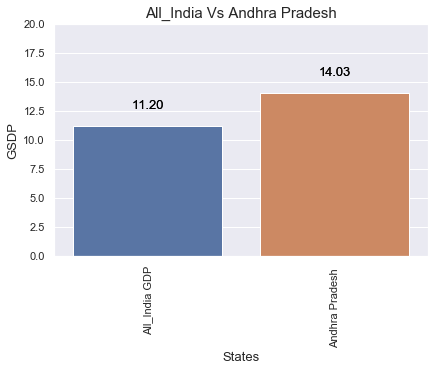

In [13]:
sns.set(rc={'figure.figsize':(6.7,4.27)})
plt.xticks(rotation=90)
result=df.sort_values('GDSP')
sns.barplot(x="State", y="GDSP", data=result);

#---------------------------------------#

#sns.set(rc={'figure.figsize':(5.7,4.27)})
plt.xticks(rotation=90)
g=sns.barplot(x="State", y="GDSP", data=result)
plt.title('All_India Vs Andhra Pradesh',fontsize=15)
plt.xlabel('States',fontsize=13)
plt.ylabel('GSDP',fontsize=13)
ax=g

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,20)

# Q3. Plot the total GDP of the states for the year 2015-16.

In [14]:
df = pd.read_csv("ab40c054-5031-4376-b52e-9813e776f65e.csv")

In [15]:
df1 = df[df['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)']
df2 = df1[df1['Duration']=='2015-16']

In [16]:
df2 = pd.melt(df2, id_vars=["Items  Description","Duration"],var_name="State", value_name="GDSP")

In [17]:
# Removing Union Territories and States which has nulls

df2 = df2[-df2['State'].isin(['Puducherry','Delhi','Chandigarh','All_India GDP','Andaman & Nicobar Islands','West Bengal1','Himachal Pradesh','Maharashtra','Manipur','Mizoram','Nagaland','Punjab','Rajasthan','Tripura'])]

df2=df2.sort_values('GDSP')

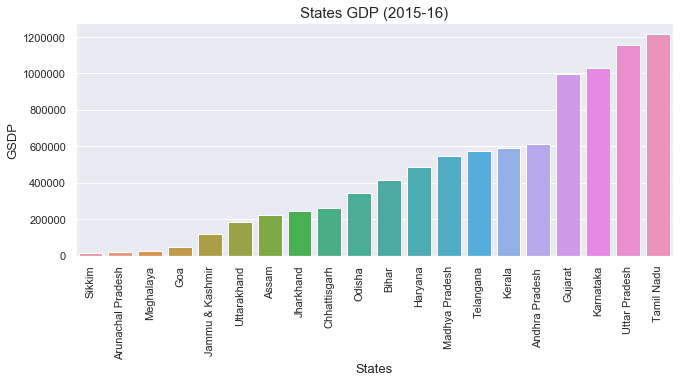

In [18]:
sns.set(rc={'figure.figsize':(10.7,4.27)})
plt.xticks(rotation=90)
result=df2.sort_values('GDSP')
sns.barplot(x="State", y="GDSP", data=result);

plt.xticks(rotation=90)
g=sns.barplot(x="State", y="GDSP", data=result)
plt.title('States GDP (2015-16)',fontsize=15)
plt.xlabel('States',fontsize=13)
plt.ylabel('GSDP',fontsize=13);

# Top 5 and Bottom 5 states based on total GDP

In [19]:
df_bottom_5 = df2.head(5)
df_bottom_5
df_top_5 = df2.sort_values('GDSP', ascending = False).head(5)

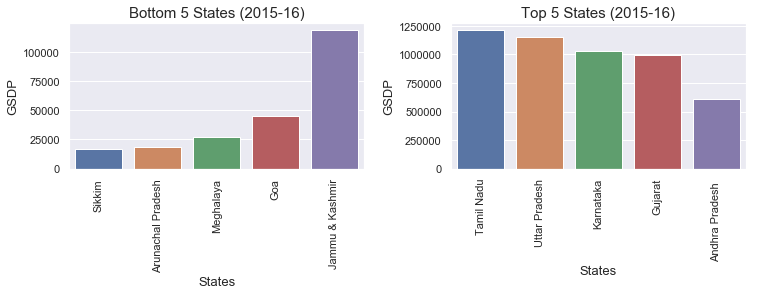

In [20]:
# Bottom 5 #
plt.subplot(1,2,1)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10.7,4.27)})
plt.xticks(rotation=90)
result=df2.sort_values('GDSP')
sns.barplot(x="State", y="GDSP", data=df_bottom_5);

plt.xticks(rotation=90)
g=sns.barplot(x="State", y="GDSP", data=df_bottom_5)
plt.title('Bottom 5 States (2015-16)',fontsize=15)
plt.xlabel('States',fontsize=13)
plt.ylabel('GSDP',fontsize=13);

#Top 5#

plt.subplot(1,2,2)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10.7,4.27)})
plt.xticks(rotation=90)
result=df2.sort_values('GDSP')
sns.barplot(x="State", y="GDSP", data=df_top_5);

plt.xticks(rotation=90)
g=sns.barplot(x="State", y="GDSP", data=df_top_5)
plt.title('Top 5 States (2015-16)',fontsize=15)
plt.xlabel('States',fontsize=13)
plt.ylabel('GSDP',fontsize=13)
plt.tight_layout();


# --------------------------------------End of Part I-A ------------------------------------------

# Part I-B:

In [10]:
import numpy as np
import pandas as pd
import seaborn as sn
df_AP = pd.read_csv("NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv")
df_ARP = pd.read_csv("NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv")
df_Assam = pd.read_csv("NAD-Assam-GSVA_cur_2015-16.csv")
df_Bihar = pd.read_csv("NAD-Bihar-GSVA_cur_2015-16.csv")
df_Chhattisgarh = pd.read_csv("NAD-Chhattisgarh-GSVA_cur_2016-17.csv")
df_Jammu_Kashmir = pd.read_csv("NAD-Jammu_Kashmir-GSVA_cur_2015-16.csv")
df_Goa = pd.read_csv("NAD-Goa-GSVA_cur_2015-16.csv")
df_Gujarat = pd.read_csv("NAD-Gujarat-GSVA_cur_2015-16.csv")
df_Haryana = pd.read_csv("NAD-Haryana-GSVA_cur_2016-17.csv")
df_Himachal_Pradesh = pd.read_csv("NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv")
df_Jharkhand = pd.read_csv("NAD-Jharkhand-GSVA_cur_2015-16.csv")
df_Karnataka = pd.read_csv("NAD-Karnataka-GSVA_cur_2015-16.csv")
df_Kerala = pd.read_csv("NAD-Kerala-GSVA_cur_2015-16.csv")
df_Madhya_Pradesh = pd.read_csv("NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv")
df_Maharashtra = pd.read_csv("NAD-Maharashtra-GSVA_cur_2014-15.csv")
df_Meghalaya = pd.read_csv("NAD-Meghalaya-GSVA_cur_2016-17.csv")
df_Mizoram = pd.read_csv("NAD-Mizoram-GSVA_cur_2014-15.csv")
df_Nagaland = pd.read_csv("NAD-Nagaland-GSVA_cur_2014-15.csv")
df_Odhisha = pd.read_csv("NAD-Odisha-GSVA_cur_2016-17.csv")
df_Punjab = pd.read_csv("NAD-Punjab-GSVA_cur_2014-15.csv")
df_Rajasthan = pd.read_csv("NAD-Rajasthan-GSVA_cur_2014-15.csv")
df_Sikkim = pd.read_csv("NAD-Sikkim-GSVA_cur_2015-16.csv")
df_Tamil_Nadu = pd.read_csv("NAD-Tamil_Nadu-GSVA_cur_2016-17.csv")
df_Telangana = pd.read_csv("NAD-Telangana-GSVA_cur_2016-17.csv")
df_Tripura = pd.read_csv("NAD-Tripura-GSVA_cur_2014-15.csv")
df_Uttar_Pradesh = pd.read_csv("NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv")
df_Uttarakhand = pd.read_csv("NAD-Uttarakhand-GSVA_cur_2015-16.csv")
df_Manipur = pd.read_csv('NAD-Manipur-GSVA_cur_2014-15.csv', encoding='latin1')

In [11]:
#---------1.AP-----------------------
df_AP = df_AP.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'],axis=1)
df_AP = df_AP.transpose()
df_AP = df_AP.reset_index(drop=True)
df_AP.columns = df_AP.iloc[0]
df_AP['State']='Andhra Pradesh'

#--------2.Arunachal Pradesh----------
df_ARP = df_ARP.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_ARP = df_ARP.transpose()
df_ARP = df_ARP.reset_index(drop=True)
df_ARP.columns = df_ARP.iloc[0]
df_ARP['State']='Arunachal Pradesh'

#--------3.Assam----------
df_Assam = df_Assam.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Assam  = df_Assam.transpose()
df_Assam = df_Assam.reset_index(drop=True)
df_Assam.columns = df_Assam.iloc[0]
df_Assam['State']= 'Assam'

#--------4.Bihar----------
df_Bihar = df_Bihar.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Bihar  = df_Bihar.transpose()
df_Bihar = df_Bihar.reset_index(drop=True)
df_Bihar.columns = df_Bihar.iloc[0]
df_Bihar['State']= 'Bihar'

#--------5.Chattisgarh----------
df_Chhattisgarh = df_Chhattisgarh.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'],axis=1)
df_Chhattisgarh  = df_Chhattisgarh.transpose()
df_Chhattisgarh = df_Chhattisgarh.reset_index(drop=True)
df_Chhattisgarh.columns = df_Chhattisgarh.iloc[0]
df_Chhattisgarh['State']= 'Chhatisgarh'

#--------6.Jammu_Kashmir----------
df_Jammu_Kashmir = df_Jammu_Kashmir.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Jammu_Kashmir  = df_Jammu_Kashmir.transpose()
df_Jammu_Kashmir = df_Jammu_Kashmir.reset_index(drop=True)
df_Jammu_Kashmir.columns = df_Jammu_Kashmir.iloc[0]
df_Jammu_Kashmir['State']= 'Jammu and Kashmir'

#--------7.Goa----------
df_Goa = df_Goa.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Goa  = df_Goa.transpose()
df_Goa = df_Goa.reset_index(drop=True)
df_Goa.columns = df_Goa.iloc[0]
df_Goa['State']= 'Goa'

#--------8.Gujarat----------
df_Gujarat = df_Gujarat.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Gujarat  = df_Gujarat.transpose()
df_Gujarat = df_Gujarat.reset_index(drop=True)
df_Gujarat.columns = df_Gujarat.iloc[0]
df_Gujarat['State']= 'Gujarat'

#--------9.Haryana----------
df_Haryana = df_Haryana.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'],axis=1)
df_Haryana  = df_Haryana.transpose()
df_Haryana = df_Haryana.reset_index(drop=True)
df_Haryana.columns = df_Haryana.iloc[0]
df_Haryana['State']= 'Haryana'

#--------10.Himachal Pradesh----------
df_Himachal_Pradesh = df_Himachal_Pradesh.drop(['S.No.','2011-12','2012-13','2013-14'],axis=1)
df_Himachal_Pradesh  = df_Himachal_Pradesh.transpose()
df_Himachal_Pradesh = df_Himachal_Pradesh.reset_index(drop=True)
df_Himachal_Pradesh.columns = df_Himachal_Pradesh.iloc[0]
df_Himachal_Pradesh['State']= 'Himachal Pradesh'

#--------11.Jharkhand Pradesh----------
df_Jharkhand = df_Jharkhand.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Jharkhand  = df_Jharkhand.transpose()
df_Jharkhand = df_Jharkhand.reset_index(drop=True)
df_Jharkhand.columns = df_Jharkhand.iloc[0]
df_Jharkhand['State']= 'Jharkhand'

#--------12.Karnataka----------
df_Karnataka = df_Karnataka.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Karnataka  = df_Karnataka.transpose()
df_Karnataka = df_Karnataka.reset_index(drop=True)
df_Karnataka.columns = df_Karnataka.iloc[0]
df_Karnataka['State']= 'Karnataka'

#--------13.Kerala----------
df_Kerala = df_Kerala.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Kerala  = df_Kerala.transpose()
df_Kerala = df_Kerala.reset_index(drop=True)
df_Kerala.columns = df_Kerala.iloc[0]
df_Kerala['State']= 'Kerala'

#--------14.Madhya Pradesh----------
df_Madhya_Pradesh = df_Madhya_Pradesh.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'],axis=1)
df_Madhya_Pradesh  = df_Madhya_Pradesh.transpose()
df_Madhya_Pradesh = df_Madhya_Pradesh.reset_index(drop=True)
df_Madhya_Pradesh.columns = df_Madhya_Pradesh.iloc[0]
df_Madhya_Pradesh['State']= 'Madhya Pradesh'

#--------15.Maharashtra----------
df_Maharashtra = df_Maharashtra.drop(['S.No.','2011-12','2012-13','2013-14'],axis=1)
df_Maharashtra  = df_Maharashtra.transpose()
df_Maharashtra = df_Maharashtra.reset_index(drop=True)
df_Maharashtra.columns = df_Maharashtra.iloc[0]
df_Maharashtra['State']= 'Maharashtra'

#--------16.Meghalaya----------
df_Meghalaya = df_Meghalaya.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'],axis=1)
df_Meghalaya  = df_Meghalaya.transpose()
df_Meghalaya = df_Meghalaya.reset_index(drop=True)
df_Meghalaya.columns = df_Meghalaya.iloc[0]
df_Meghalaya['State']= 'Meghalaya'

#--------17.Mizoram----------
df_Mizoram = df_Mizoram.drop(['S.No.','2011-12','2012-13','2013-14'],axis=1)
df_Mizoram  = df_Mizoram.transpose()
df_Mizoram = df_Mizoram.reset_index(drop=True)
df_Mizoram.columns = df_Mizoram.iloc[0]
df_Mizoram['State']= 'Mizoram'

#--------18.Nagaland----------
df_Nagaland = df_Nagaland.drop(['S.No.','2011-12','2012-13','2013-14'],axis=1)
df_Nagaland  = df_Nagaland.transpose()
df_Nagaland = df_Nagaland.reset_index(drop=True)
df_Nagaland.columns = df_Nagaland.iloc[0]
df_Nagaland['State']= 'Nagaland'

#--------19.Odhisha----------
df_Odhisha = df_Odhisha.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'],axis=1)
df_Odhisha  = df_Odhisha.transpose()
df_Odhisha = df_Odhisha.reset_index(drop=True)
df_Odhisha.columns = df_Odhisha.iloc[0]
df_Odhisha['State']= 'Odisha'

#--------20.Punjab----------
df_Punjab = df_Punjab.drop(['S.No.','2011-12','2012-13','2013-14'],axis=1)
df_Punjab  = df_Punjab.transpose()
df_Punjab = df_Punjab.reset_index(drop=True)
df_Punjab.columns = df_Punjab.iloc[0]
df_Punjab['State']= 'Punjab'

#--------21.Rajasthan----------
df_Rajasthan = df_Rajasthan.drop(['S.No.','2011-12','2012-13','2013-14'],axis=1)
df_Rajasthan  = df_Rajasthan.transpose()
df_Rajasthan = df_Rajasthan.reset_index(drop=True)
df_Rajasthan.columns = df_Rajasthan.iloc[0]
df_Rajasthan['State']= 'Rajasthan'

#--------22.Sikkim----------
df_Sikkim = df_Sikkim.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Sikkim  = df_Sikkim.transpose()
df_Sikkim = df_Sikkim.reset_index(drop=True)
df_Sikkim.columns = df_Sikkim.iloc[0]
df_Sikkim['State']= 'Sikkim'

#--------23.Tamil Nadu----------
df_Tamil_Nadu = df_Tamil_Nadu.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'],axis=1)
df_Tamil_Nadu  = df_Tamil_Nadu.transpose()
df_Tamil_Nadu = df_Tamil_Nadu.reset_index(drop=True)
df_Tamil_Nadu.columns = df_Tamil_Nadu.iloc[0]
df_Tamil_Nadu['State']= 'Tamil Nadu'

#--------24.Telangana----------
df_Telangana = df_Telangana.drop(['S.No.','2011-12','2012-13','2013-14','2015-16','2016-17'],axis=1)
df_Telangana  = df_Telangana.transpose()
df_Telangana = df_Telangana.reset_index(drop=True)
df_Telangana.columns = df_Telangana.iloc[0]
df_Telangana['State']= 'Telangana'

#--------25.Tripura----------
df_Tripura = df_Tripura.drop(['S.No.','2011-12','2012-13','2013-14'],axis=1)
df_Tripura  = df_Tripura.transpose()
df_Tripura = df_Tripura.reset_index(drop=True)
df_Tripura.columns = df_Tripura.iloc[0]
df_Tripura['State']= 'Tripura'

#--------26.Uttar Pradesh----------
df_Uttar_Pradesh = df_Uttar_Pradesh.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Uttar_Pradesh  = df_Uttar_Pradesh.transpose()
df_Uttar_Pradesh = df_Uttar_Pradesh.reset_index(drop=True)
df_Uttar_Pradesh.columns = df_Uttar_Pradesh.iloc[0]
df_Uttar_Pradesh['State']= 'Uttar Pradesh'

#--------27.Uttarakhand----------
df_Uttarakhand = df_Uttarakhand.drop(['S.No.','2011-12','2012-13','2013-14','2015-16'],axis=1)
df_Uttarakhand  = df_Uttarakhand.transpose()
df_Uttarakhand = df_Uttarakhand.reset_index(drop=True)
df_Uttarakhand.columns = df_Uttarakhand.iloc[0]
df_Uttarakhand['State']= 'Uttrakhand'

#--------28.Manipur----------
df_Manipur = df_Manipur.drop(['S.No.','2011-12','2012-13','2013-14'],axis=1)
df_Manipur  = df_Manipur.transpose()
df_Manipur = df_Manipur.reset_index(drop=True)
df_Manipur.columns = df_Manipur.iloc[0]
df_Manipur['State']= 'Manipur'

#------------29. West_Bengal----------------

# Data was not available from Govt site


In [12]:
df_states = pd.concat([df_AP, df_ARP,df_Assam,df_Bihar,df_Chhattisgarh,df_Jammu_Kashmir,df_Goa,df_Gujarat,
                      df_Haryana,df_Himachal_Pradesh,df_Jharkhand,df_Karnataka,df_Kerala,df_Madhya_Pradesh,
                      df_Maharashtra,df_Manipur,df_Meghalaya,df_Mizoram,df_Nagaland,df_Odhisha,df_Punjab,
                      df_Rajasthan,df_Sikkim,df_Tamil_Nadu,df_Telangana,df_Tripura,df_Uttar_Pradesh,
                       df_Uttarakhand],ignore_index=True,sort=True)

 # Plot the GDP per capita for all the states

In [13]:
df_states = df_states.drop([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54])

In [14]:
df_states = df_states.astype({'Crops':int, 'Livestock':int,"Population ('00)":int,"Gross State Domestic Product":int,'Primary':int,
                             'Secondary':int,'Tertiary':int,'Per Capita GSDP (Rs.)':int})

In [15]:
df_states['GDP Per Capita']= df_states['Per Capita GSDP (Rs.)']

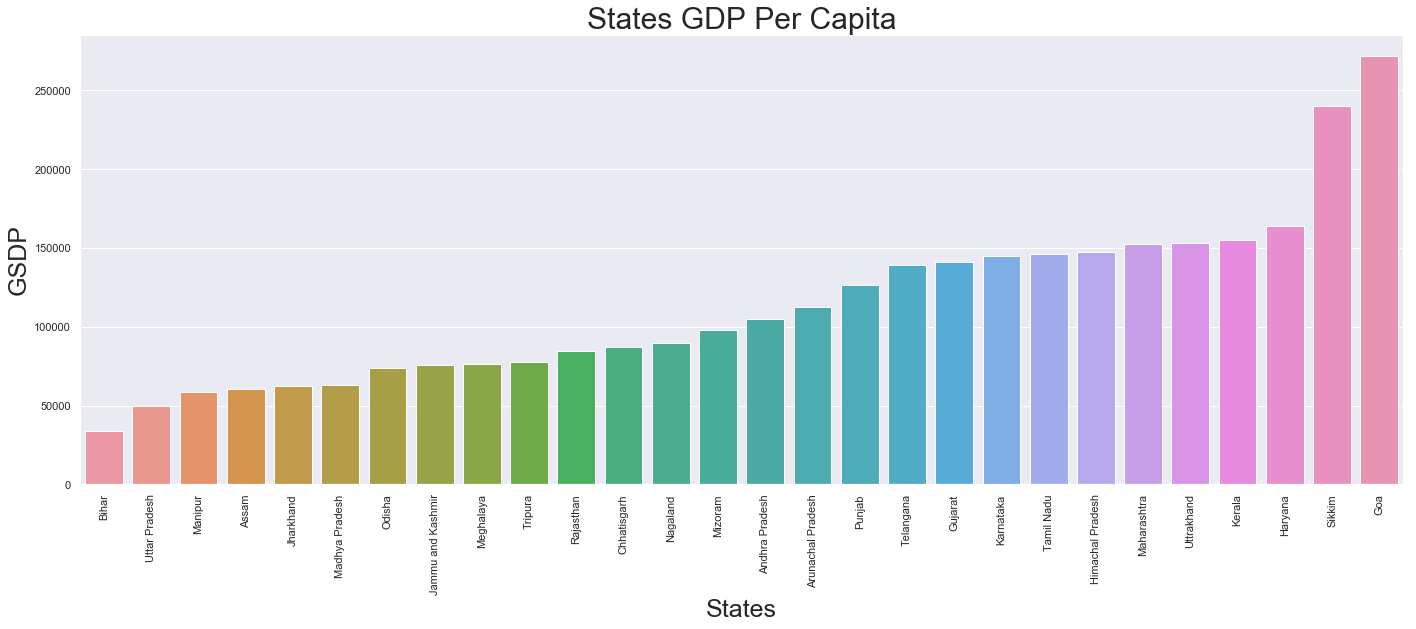

In [19]:
sns.set(rc={'figure.figsize':(23.7,8.27)})
plt.xticks(rotation=90)
result=df_states.sort_values('GDP Per Capita')
sns.barplot(x="State", y="GDP Per Capita", data=result);

#---------------------------------------#

#sns.set(rc={'figure.figsize':(20.7,4.27)})
plt.xticks(rotation=90)
g=sns.barplot(x="State", y="GDP Per Capita", data=result)
plt.title('States GDP Per Capita',fontsize=30)
plt.xlabel('States',fontsize=25)
plt.ylabel('GSDP',fontsize=25);

In [20]:
df_states2=df_states.sort_values('GDP Per Capita')
df_bottom_5 = df_states2.head(5)
df_top_5 = df_states2.sort_values('GDP Per Capita', ascending = False).head(5)

# Top 5 and Bottom 5 states based on the GDP Per Capita

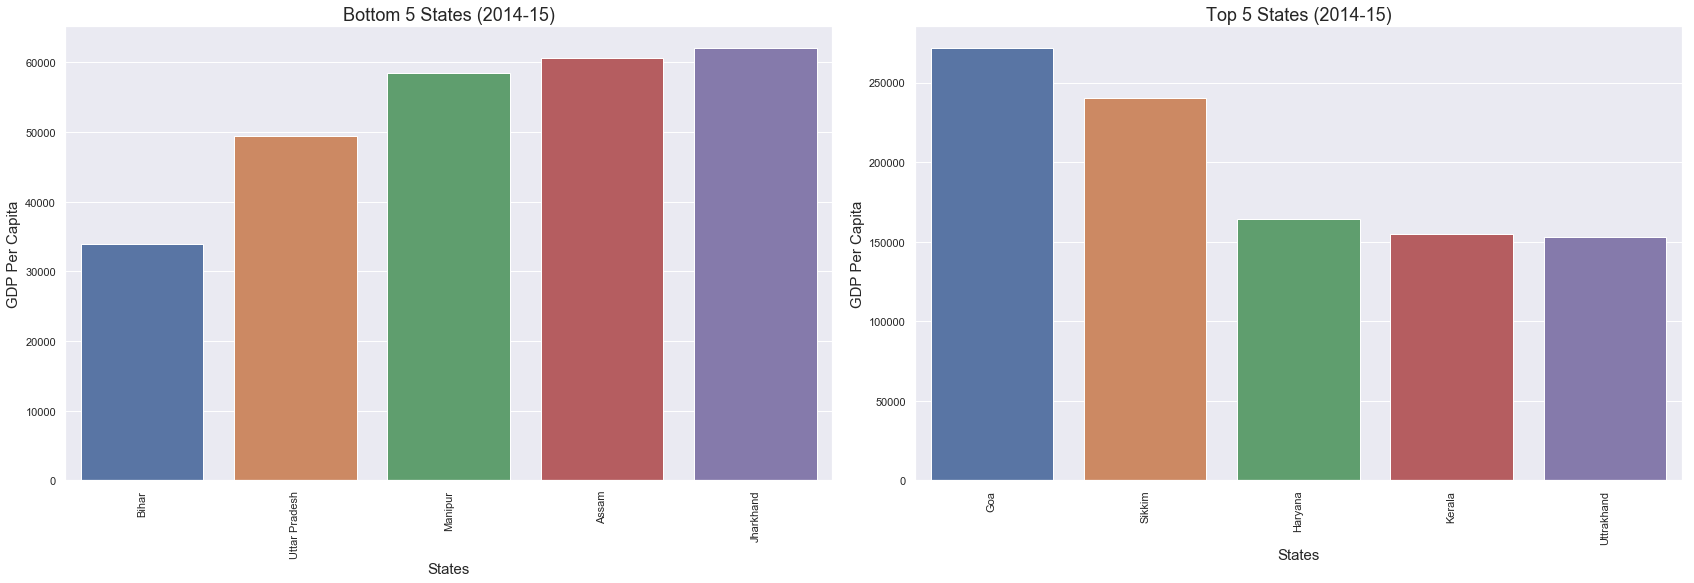

In [21]:
# Bottom 5 #
plt.subplot(1,2,1)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(6.7,4.27)})
plt.xticks(rotation=90)
result=df_states2.sort_values('GDP Per Capita')
sns.barplot(x="State", y="GDP Per Capita", data=df_bottom_5);

plt.xticks(rotation=90)
g=sns.barplot(x="State", y="GDP Per Capita", data=df_bottom_5)
plt.title('Bottom 5 States (2014-15)',fontsize=18)
plt.xlabel('States',fontsize=15)
plt.ylabel('GDP Per Capita',fontsize=15)
plt.tight_layout();

#Top 5#

plt.subplot(1,2,2)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(6.7,4.27)})
plt.xticks(rotation=90)
result=df_states2.sort_values('GDP Per Capita')
sns.barplot(x="State", y="GDP Per Capita", data=df_top_5);

plt.xticks(rotation=90)
g=sns.barplot(x="State", y="GDP Per Capita", data=df_top_5)
plt.title('Top 5 States (2014-15)',fontsize=18)
plt.xlabel('States',fontsize=15)
plt.ylabel('GDP Per Capita',fontsize=15)
plt.tight_layout();

# Find the ratio of the highest per capita GDP to the lowest per capita GDP

In [22]:
Highest_Per_Capita = round(df_states['GDP Per Capita'].max(),2)
Lowest_Per_Capita = round(df_states['GDP Per Capita'].min(),2)
Ratio = Highest_Per_Capita/Lowest_Per_Capita
print(round(Ratio))

8.0


# Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states

In [23]:
df_states['GDSP']=df_states['Gross State Domestic Product']
df_states['Primary %'] = (df_states[['Primary']].div(df_states.GDSP,axis = 0))*100
df_states['Secondary %'] = (df_states[['Secondary']].div(df_states.GDSP,axis = 0))*100
df_states['Tertiary %'] = (df_states[['Tertiary']].div(df_states.GDSP,axis = 0))*100

df_contribution = df_states[['State','Primary %','Secondary %','Tertiary %']]

In [24]:
df_contribution = df_contribution.transpose()
df_contribution = df_contribution.reset_index(drop=True)
df_contribution.columns = df_contribution.iloc[0]

df_contribution ['Sectors'] = 'Primary %'
df_contribution.Sectors.iloc[[1]] = 'Secondary %'
df_contribution.Sectors.iloc[[2]] = 'Tertiary %'

In [25]:
df_contribution.head(10)

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhatisgarh,Jammu and Kashmir,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttrakhand,Sectors
0,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhatisgarh,Jammu and Kashmir,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttrakhand,Primary %
1,30.9681,42.7749,26.8892,21.4484,27.2396,16.138,7.68165,17.7505,18.3797,14.8355,...,27.9817,25.2603,31.2217,9.1244,12.2005,17.8673,31.7601,24.9185,11.3959,Secondary %
2,19.9231,17.1521,20.3591,16.0058,35.0618,22.6696,38.0856,36.8967,28.7143,39.4674,...,27.9208,21.4801,21.2821,55.5746,30.0595,19.414,16.3279,24.4867,47.1825,Tertiary %
3,41.8505,37.6968,46.9823,59.3174,32.2952,55.9067,42.7784,33.7648,43.9503,39.6031,...,38.0664,45.4275,42.496,31.7636,48.8244,55.6977,50.0464,44.0581,34.4968,Primary %


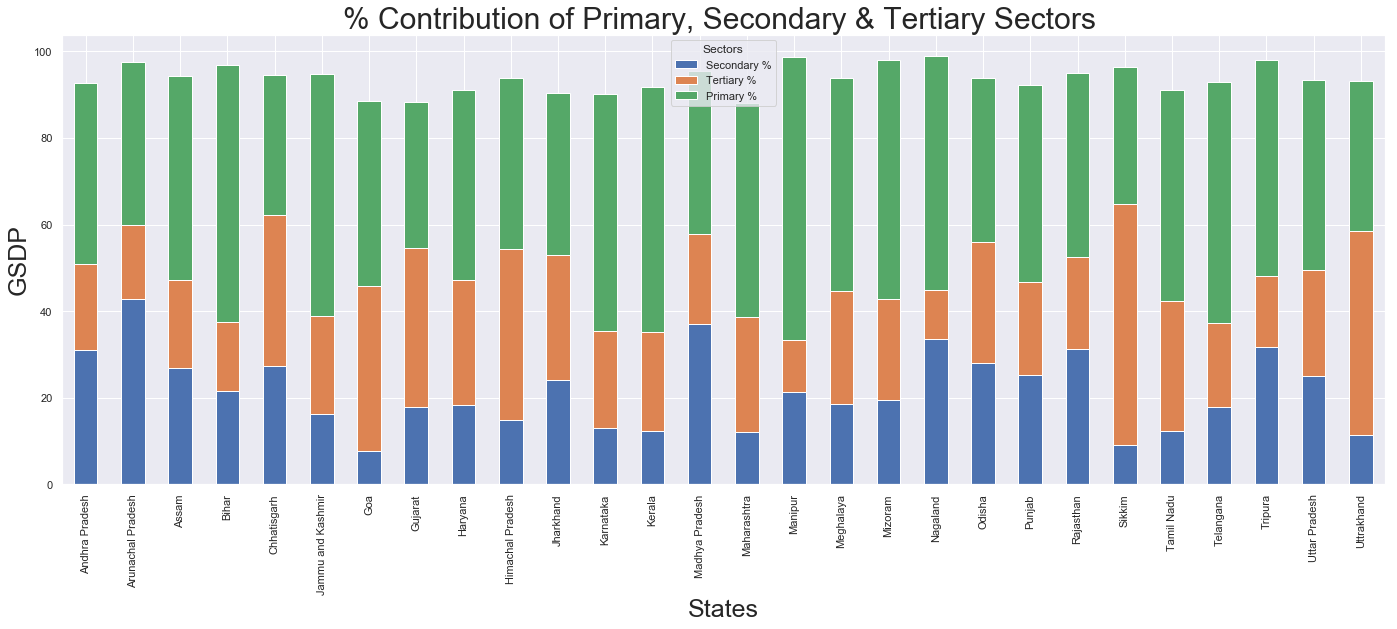

In [33]:
sns.set(rc={'figure.figsize':(23.7,8.27)})
df_contribution.set_index('Sectors').T.plot(kind='bar', stacked=True)

plt.xticks(rotation=90)
plt.title('% Contribution of Primary, Secondary & Tertiary Sectors ',fontsize=30)
plt.xlabel('States',fontsize=25)
plt.ylabel('GSDP',fontsize=25);

# Categorization of states into C1, C2, C3 & C4

In [34]:
df_category = df_states.sort_values('GDP Per Capita')
df_category['GDP Per Capita'].quantile([0.2,0.5,0.85,1])

0.20     67385.00
0.50    101332.00
0.85    153064.85
1.00    271793.00
Name: GDP Per Capita, dtype: float64

In [35]:
df_category['Category']= df_category['GDP Per Capita'].apply(lambda x: "C4" if 0 < x < 67385 else 
                                                             "C3" if 67385 < x < 101332 else 
                                                             "C2" if 101332 < x < 153064.85 else "C1" )

In [36]:
df_category['Agriculture, forestry and fishing %'] = (df_category[['Agriculture, forestry and fishing']].div(df_category.GDSP,axis = 0))*100
df_category['Mining and quarrying %'] = (df_category[['Mining and quarrying']].div(df_category.GDSP,axis = 0))*100
df_category['Manufacturing %'] = (df_category[['Manufacturing']].div(df_category.GDSP,axis = 0))*100
df_category['Electricity, gas, water supply & other utility services %'] = (df_category[['Electricity, gas, water supply & other utility services']].div(df_category.GDSP,axis = 0))*100
df_category['Construction %'] = (df_category[['Construction']].div(df_category.GDSP,axis = 0))*100
df_category['Trade, repair, hotels and restaurants %'] = (df_category[['Trade, repair, hotels and restaurants']].div(df_category.GDSP,axis = 0))*100
df_category['Transport, storage, communication & services related to broadcasting %'] = (df_category[['Transport, storage, communication & services related to broadcasting']].div(df_category.GDSP,axis = 0))*100
df_category['Financial services %'] = (df_category[['Financial services']].div(df_category.GDSP,axis = 0))*100
df_category['Real estate, ownership of dwelling & professional services %'] = (df_category[['Real estate, ownership of dwelling & professional services']].div(df_category.GDSP,axis = 0))*100
df_category['Public administration %'] = (df_category[['Public administration']].div(df_category.GDSP,axis = 0))*100
df_category['Other services %'] = (df_category[['Other services']].div(df_category.GDSP,axis = 0))*100

In [37]:
df_subsectors = df_category[['Category','Agriculture, forestry and fishing %','Mining and quarrying %','Manufacturing %',
                           'Electricity, gas, water supply & other utility services %','Construction %',
                           'Trade, repair, hotels and restaurants %','Transport, storage, communication & services related to broadcasting %',
                           'Financial services %','Real estate, ownership of dwelling & professional services %','Public administration %',
                           'Other services %']]

columns = ["Category","Agriculture, forestry and fishing %","Mining and quarrying %","Manufacturing %",
                           "Electricity, gas, water supply & other utility services %","Construction %",
                           "Trade, repair, hotels and restaurants %","Transport, storage, communication & services related to broadcasting %",
                           "Financial services %","Real estate, ownership of dwelling & professional services %","Public administration %",
                           "Other services %"]

df_category_melt = pd.melt(df_subsectors,id_vars=columns[0],\
                                var_name="Sub Sectors", value_name="GDSP")

In [38]:
df_category_melt_C1 = df_category_melt[df_category_melt['Category']=='C1']
df_category_melt_C2 = df_category_melt[df_category_melt['Category']=='C2']
df_category_melt_C3 = df_category_melt[df_category_melt['Category']=='C3']
df_category_melt_C4 = df_category_melt[df_category_melt['Category']=='C4']

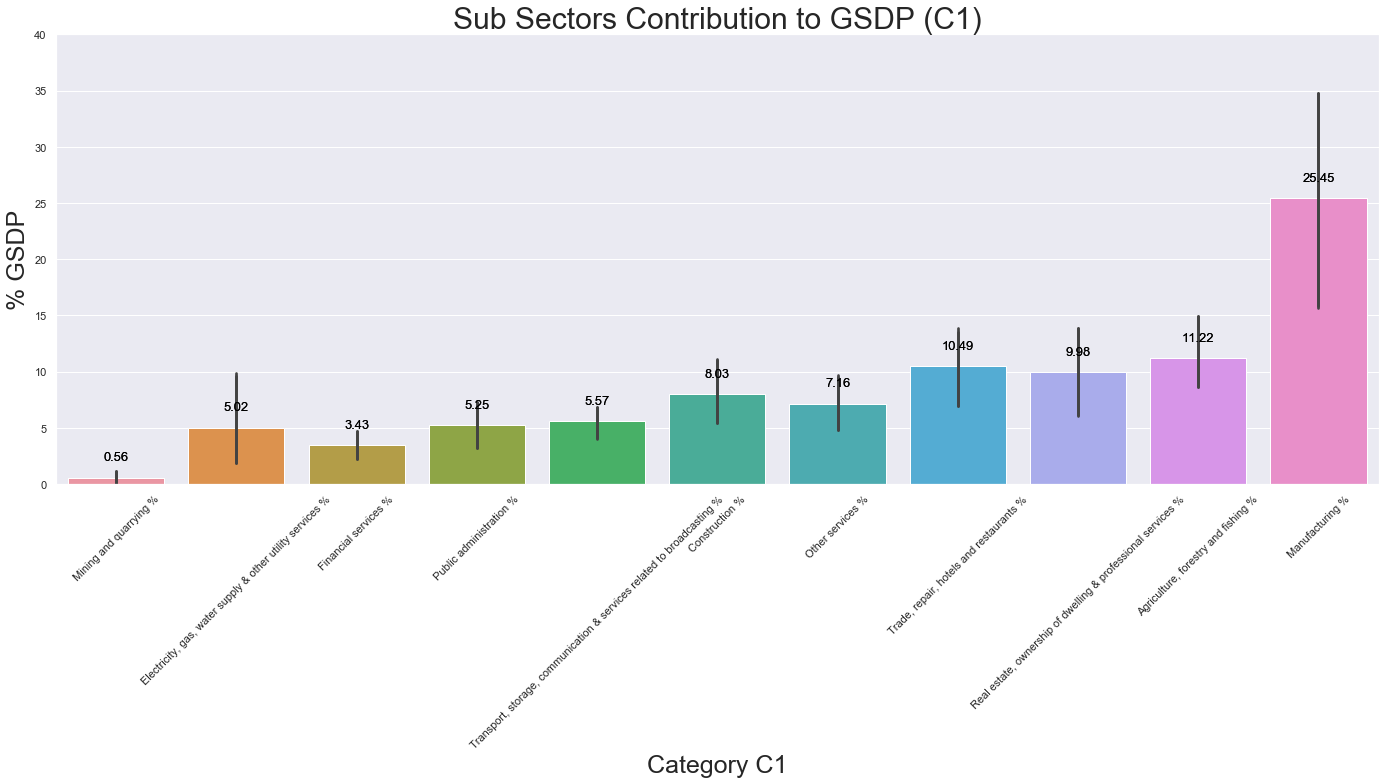

In [39]:
sns.set(rc={'figure.figsize':(23.7,8.27)})
plt.xticks(rotation=90)
result_C1=df_category_melt_C1.sort_values('GDSP', ascending = True)
sns.barplot(x="Sub Sectors", y="GDSP", data=result_C1);

plt.xticks(rotation=45)
g=sns.barplot(x="Sub Sectors", y="GDSP", data=result_C1)
plt.title('Sub Sectors Contribution to GSDP (C1)',fontsize=30)
plt.xlabel('Category C1',fontsize=25)
plt.ylabel('% GSDP',fontsize=25);

ax=g

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,40)

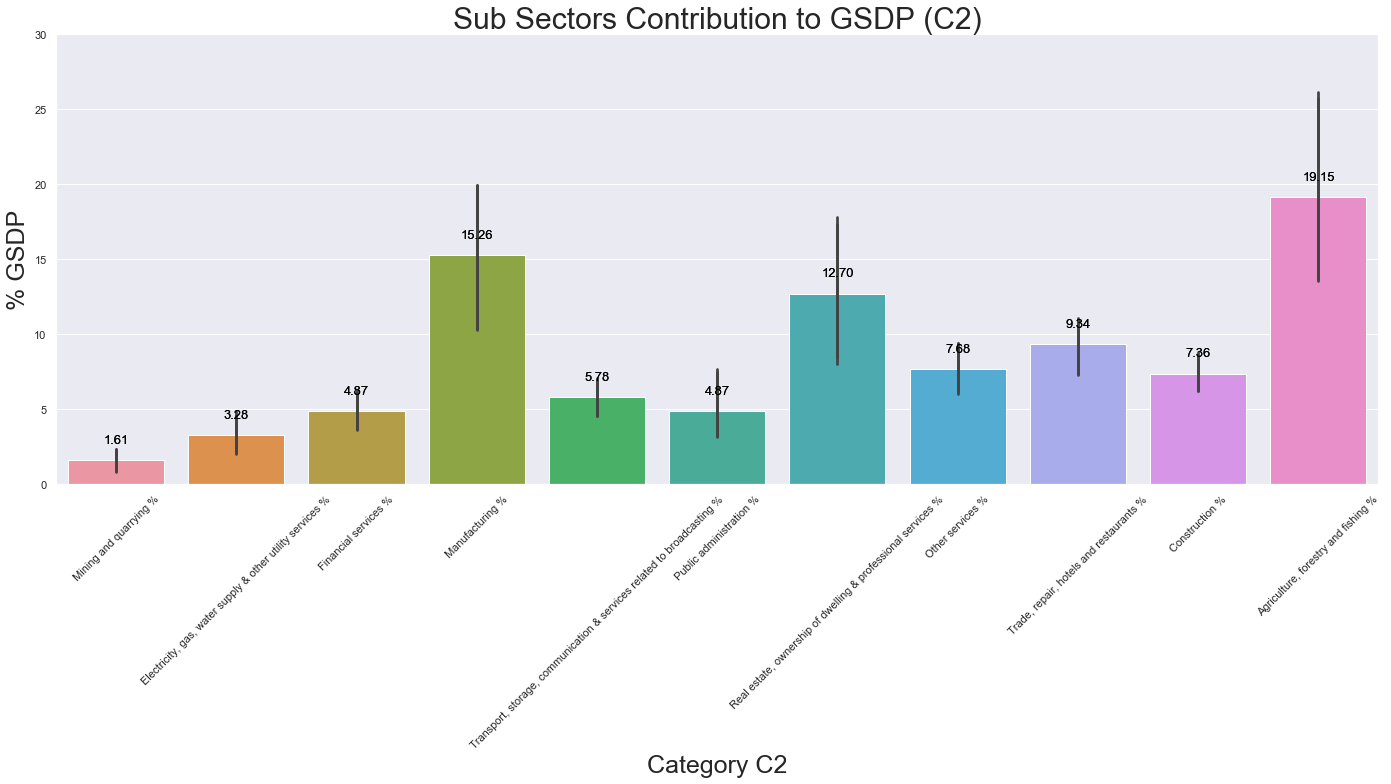

In [40]:
sns.set(rc={'figure.figsize':(23.7,8.27)})
plt.xticks(rotation=90)
result_C2=df_category_melt_C2.sort_values('GDSP', ascending = True)
sns.barplot(x="Sub Sectors", y="GDSP", data=result_C2);

plt.xticks(rotation=45)
g=sns.barplot(x="Sub Sectors", y="GDSP", data=result_C2)
plt.title('Sub Sectors Contribution to GSDP (C2)',fontsize=30)
plt.xlabel('Category C2',fontsize=25)
plt.ylabel('% GSDP',fontsize=25);

ax=g

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,30)

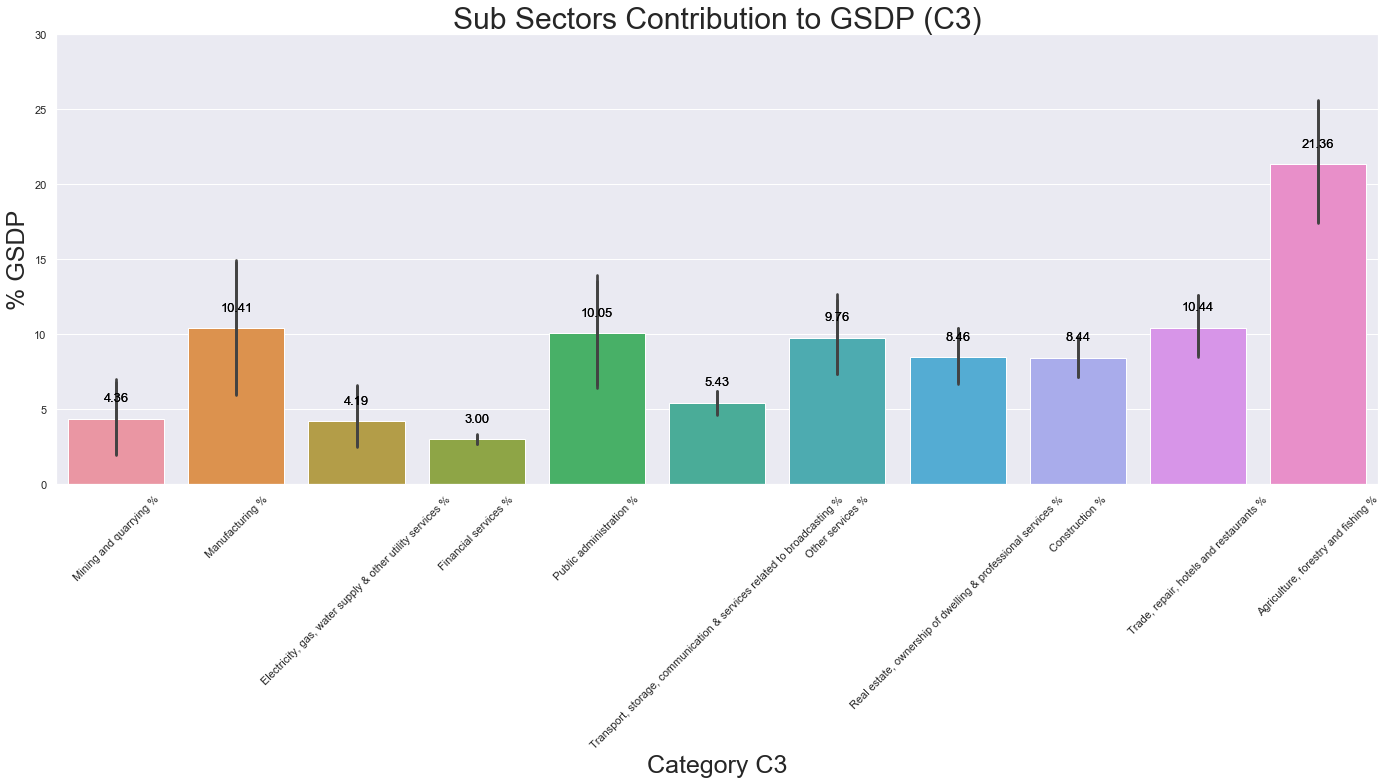

In [41]:
sns.set(rc={'figure.figsize':(23.7,8.27)})
plt.xticks(rotation=90)
result_C3=df_category_melt_C3.sort_values('GDSP', ascending = True)
sns.barplot(x="Sub Sectors", y="GDSP", data=result_C3);

plt.xticks(rotation=45)
g=sns.barplot(x="Sub Sectors", y="GDSP", data=result_C3)
plt.title('Sub Sectors Contribution to GSDP (C3)',fontsize=30)
plt.xlabel('Category C3',fontsize=25)
plt.ylabel('% GSDP',fontsize=25);

ax=g

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,30)

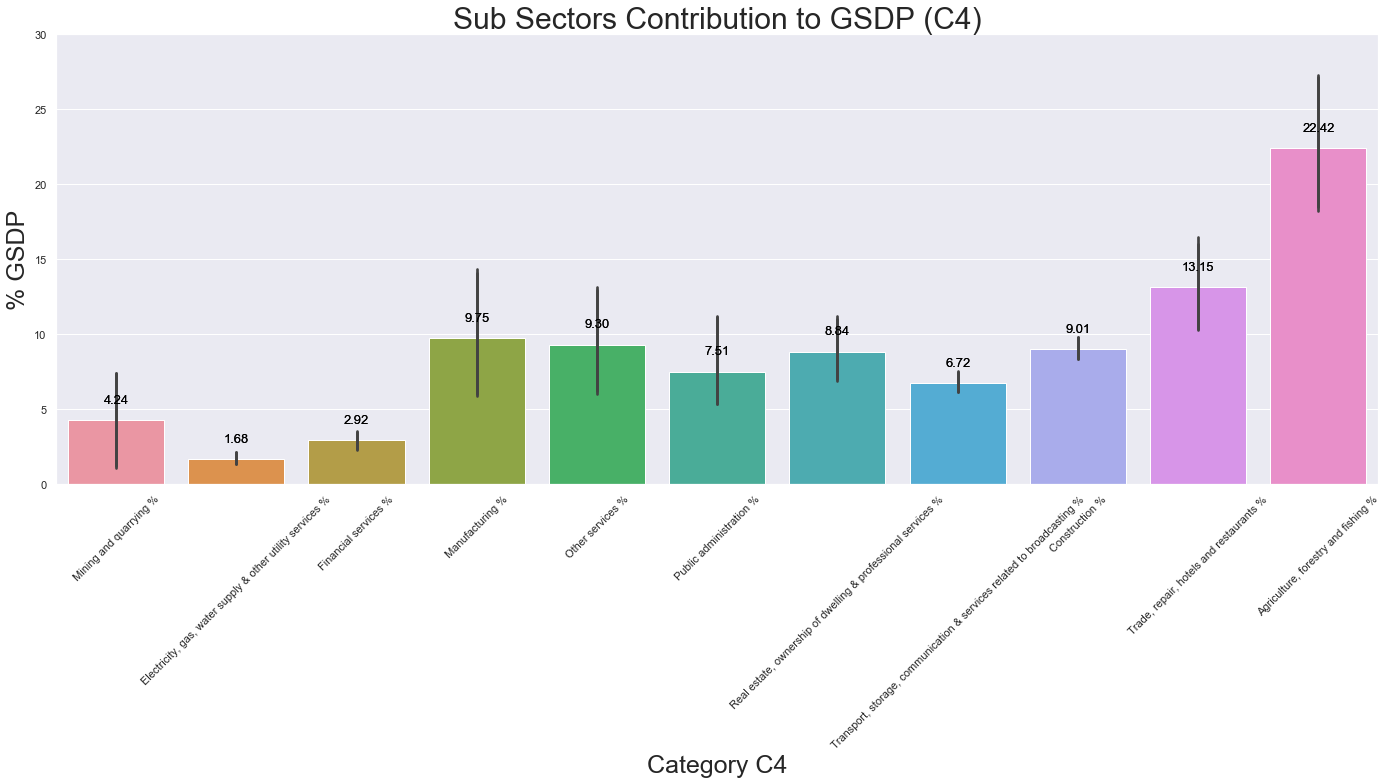

In [42]:
sns.set(rc={'figure.figsize':(23.7,8.27)})
plt.xticks(rotation=90)
result_C4=df_category_melt_C4.sort_values('GDSP', ascending = True)
sns.barplot(x="Sub Sectors", y="GDSP", data=result_C4);

plt.xticks(rotation=45)
g=sns.barplot(x="Sub Sectors", y="GDSP", data=result_C4)
plt.title('Sub Sectors Contribution to GSDP (C4)',fontsize=30)
plt.xlabel('Category C4',fontsize=25)
plt.ylabel('% GSDP',fontsize=25);

ax=g

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,30)

# 1. How does the GDP distribution of the top sates (C1) from the others?

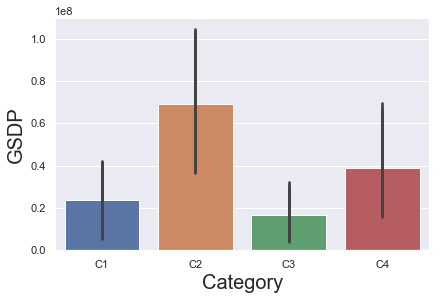

In [43]:
sns.set(rc={'figure.figsize':(6.7,4.27)})
plt.xticks(rotation=90)
result=df_category.sort_values('Category')
sns.barplot(x="Category", y="GDSP", data=result);

plt.xticks(rotation=0)
g=sns.barplot(x="Category", y="GDSP", data=result)
plt.xlabel('Category',fontsize=20)
plt.ylabel('GSDP',fontsize=20);

# 2. Which Sub Sectors seems to be correlated with high GDP?

Answer:

(Trade, repair, hotels and restaurants) Vs (Construction) = 1

(Transport, storage, communication & services related to broadcasting) Vs (Trade, repair, hotels and restaurants) =1


(Transport, storage, communication & services related to broadcasting) VS (Construction) =0.99

(Real estate, ownership of dwelling & professional services) Vs Financial Services = 0.99

(Other Services) Vs (Public Administration) = 0.99

(Financial Services) vs (Transport, storage, communication & services related to broadcasting) =0.98

In [44]:
df_subsectors_GDSP = df_category[['Category','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing',
                           'Electricity, gas, water supply & other utility services','Construction',
                           'Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting',
                           'Financial services','Real estate, ownership of dwelling & professional services','Public administration',
                           'Other services']]

columns = ["Category","Agriculture, forestry and fishing","Mining and quarrying","Manufacturing",
                           "Electricity, gas, water supply & other utility services","Construction",
                           "Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",
                           "Financial services","Real estate, ownership of dwelling & professional services","Public administration",
                           "Other services"]


df_subsectors_GDSP_melt = pd.melt(df_subsectors_GDSP,id_vars=columns[0],\
                                var_name="Sub_Sectors", value_name="GDSP")


In [45]:
df_subsectors_GDSP = df_subsectors_GDSP[df_subsectors_GDSP['Category']=='C1']
df_subsectors_GDSP=df_subsectors_GDSP.drop('Category',axis=1)
df_subsectors_GDSP = df_subsectors_GDSP.astype({'Agriculture, forestry and fishing':int,'Mining and quarrying':int,'Manufacturing':int,
                           'Electricity, gas, water supply & other utility services':int,'Construction':int,
                           'Trade, repair, hotels and restaurants':int,'Transport, storage, communication & services related to broadcasting':int,
                           'Financial services':int,'Real estate, ownership of dwelling & professional services':int,'Public administration':int,
                           'Other services':int})


In [46]:
cor = df_subsectors_GDSP.corr()

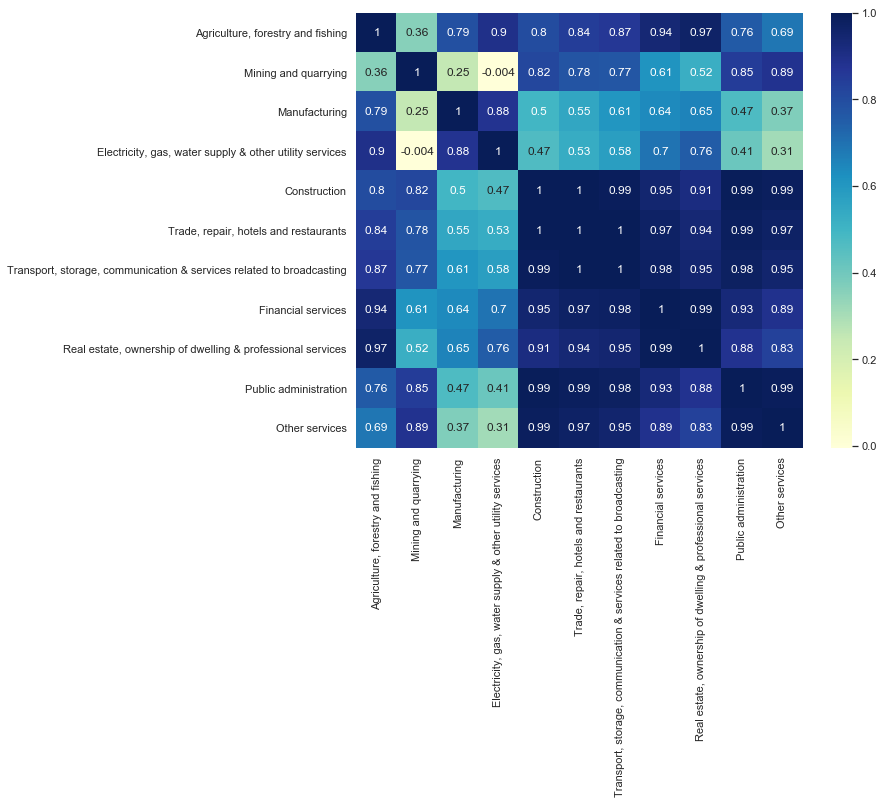

In [47]:
round(cor, 3)
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# 3. Which sub-sectors do the various categories need to focus on?

Answer: 

1. Mining & Quarrying from C1
2. (Mining and quarrying) and (Electricity, gas, water supply & other utility services) from C2
3. Financial Services, (Electricity, gas, water supply & other utility services) and (Mining & Quarrying) from C3 
4. ( Electricity, gas, water supply & other utility services) and (Financial Services ) from C4



# Recommendations:

## Category 1: Mining & Quarrying

1. Improving Environment performance: 
    
   By systematic examination on environmental impacts and adopting measures to mitigate these impacts.
   
   
2. Building from reusable waste: 

   Aluminum can be substituted as a recyclable material rather than using bauxite ore, which is a rare reusable item.
 

## Category 2: Electricity, gas, water supply & other utility services

1. Adequate staffing levels and training in the use of new technologies are important for ensuring efficiency 
2. Developing joint strategies by the social partners to improve utility services, with the common goal of extending access to services to all communities

## Category 3: Financial Services

1. Recovering outstanding debt by chasing the customers.
2. Selling unused assets and using new market techniques

## Category 4: ( Electricity, gas, water supply & other utility services) and (Financial Services )

1. Establishing national or sector specific training programmes, and investing in workers through apprenticeships and lifelong learning mechanisms to Utility Services
2. Offering additional payment options to Financial Services

# -------------------------------------End of Part I-B--------------------------------------------

# Part - II: GDP and Education Dropout Rates

In [48]:
df_dropouts = pd.read_csv("rs_session243_au570_1.1.csv")

In [49]:
# Removing Union Territories and All India
df_dropouts = df_dropouts[-df_dropouts['Level of Education - State'].isin(['A & N Islands','Chandigarh','Dadra & Nagar Haveli',
                                                                          'Daman & Diu','Delhi','All India','Puducherry','Lakshadweep'])]

In [50]:
# Dropping unwanted Columns

df_dropouts = df_dropouts.drop(['Sl. No.','Primary - 2012-2013','Primary - 2014-2015','Upper Primary - 2012-2013','Upper Primary - 2013-2014','Secondary - 2012-2013','Secondary - 2013-2014','Senior Secondary - 2012-2013','Senior Secondary - 2013-2014','Senior Secondary - 2014-2015'], axis=1)

In [51]:
df_dropouts['State'] = df_dropouts[['Level of Education - State']]
df_dropouts = df_dropouts.drop(['Level of Education - State'],axis=1)
df_dropouts['State']= df_dropouts['State'].str.strip()

In [52]:
# Merging Dropouts with States GDSP
df_dropouts = pd.merge(df_dropouts, df_states, how='inner', on='State')

In [53]:
df_dropouts = df_dropouts[['State','GDP Per Capita','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df_dropouts = df_dropouts.reset_index(drop=True)

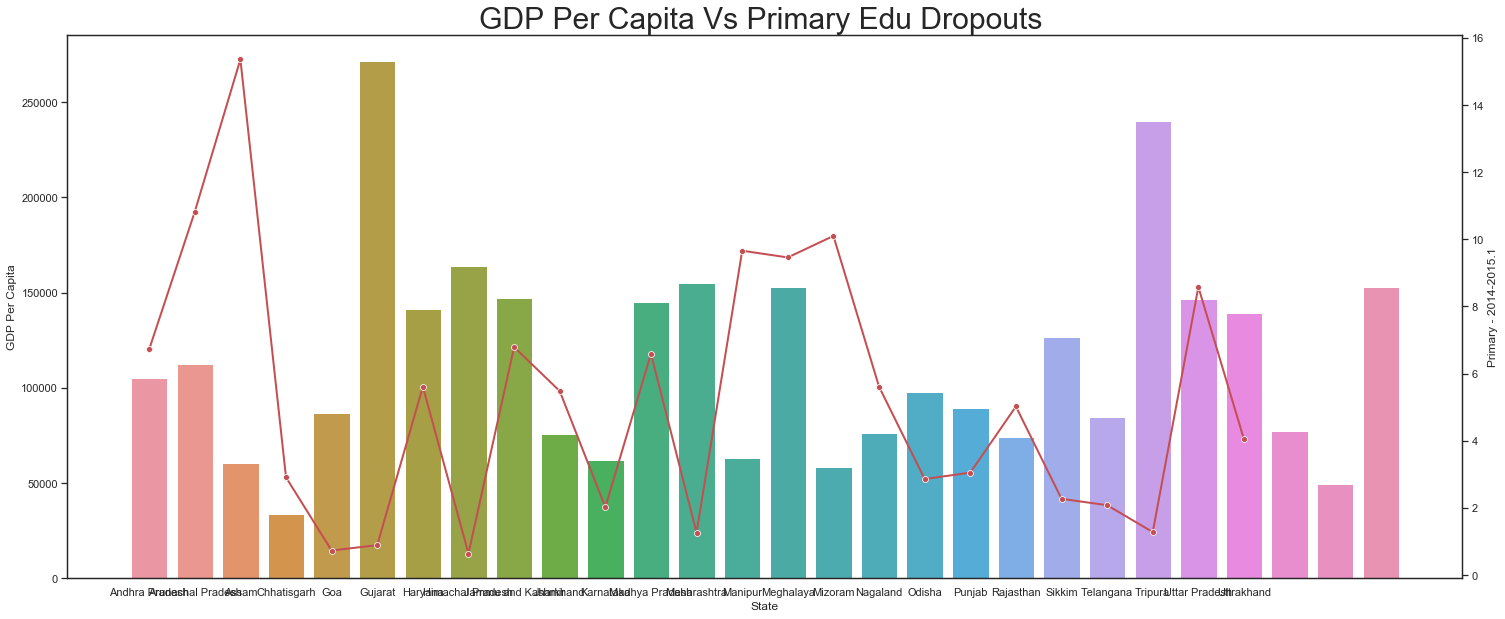

In [54]:
sns.set(style="white", rc={"lines.linewidth": 2})
fig, ax1 = plt.subplots(figsize=(25,10))
ax2 = ax1.twinx()
sns.barplot(x= df_dropouts['State'],
            y= df_dropouts['GDP Per Capita'], 
            ax=ax1)
sns.lineplot(x=df_dropouts['State'], 
             y=df_dropouts['Primary - 2014-2015.1'],
             color='r',
             marker="o",
             ax=ax2)
plt.title('GDP Per Capita Vs Primary Edu Dropouts ',fontsize=30)
plt.xlabel('State',fontsize=25)
plt.show()

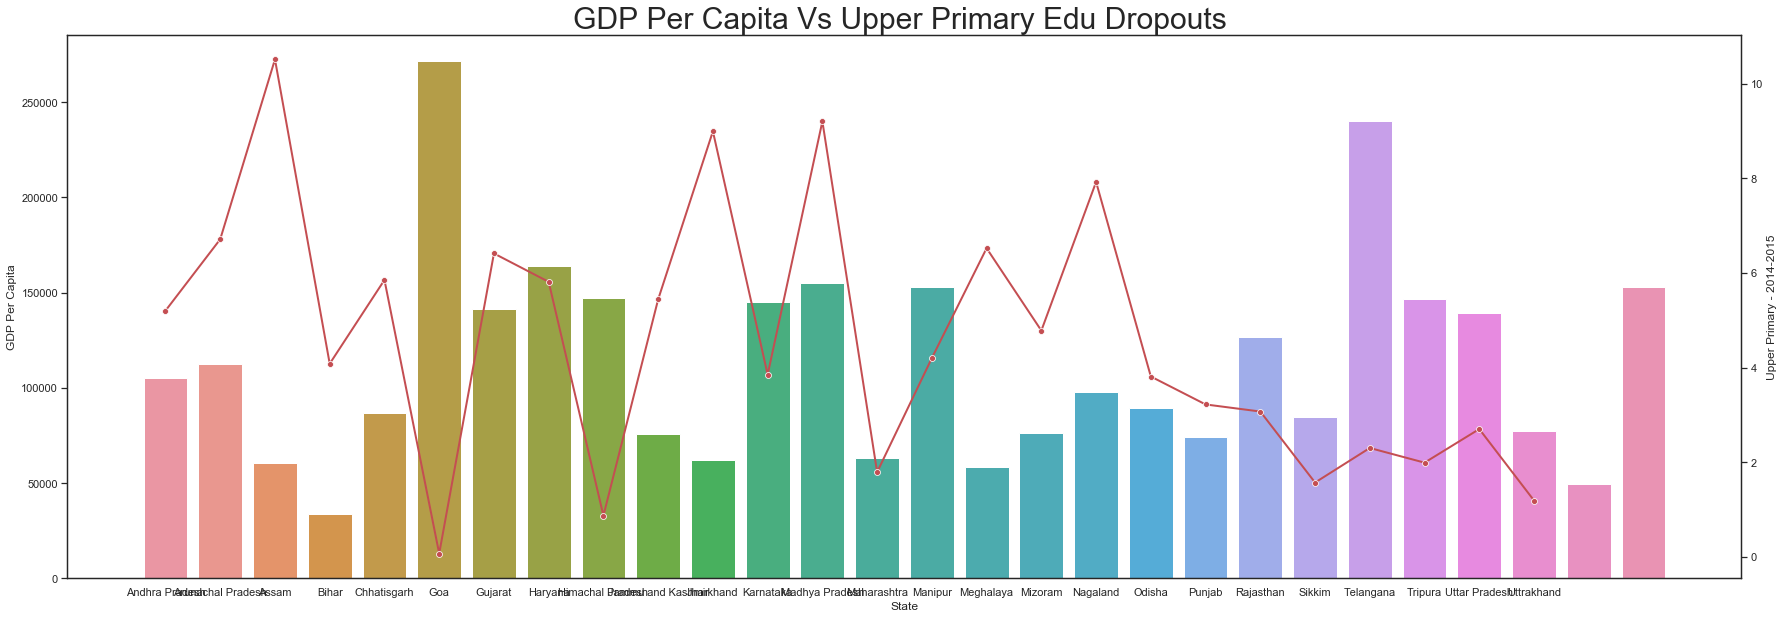

In [55]:
sns.set(style="white", rc={"lines.linewidth": 2})
fig, ax1 = plt.subplots(figsize=(30,10))
ax2 = ax1.twinx()
sns.barplot(x= df_dropouts['State'],
            y= df_dropouts['GDP Per Capita'], 
            ax=ax1)
sns.lineplot(x=df_dropouts['State'], 
             y=df_dropouts['Upper Primary - 2014-2015'],
             color='r',
             marker="o",
             ax=ax2)
plt.title('GDP Per Capita Vs Upper Primary Edu Dropouts ',fontsize=30)
plt.xlabel('State',fontsize=25)
plt.show()

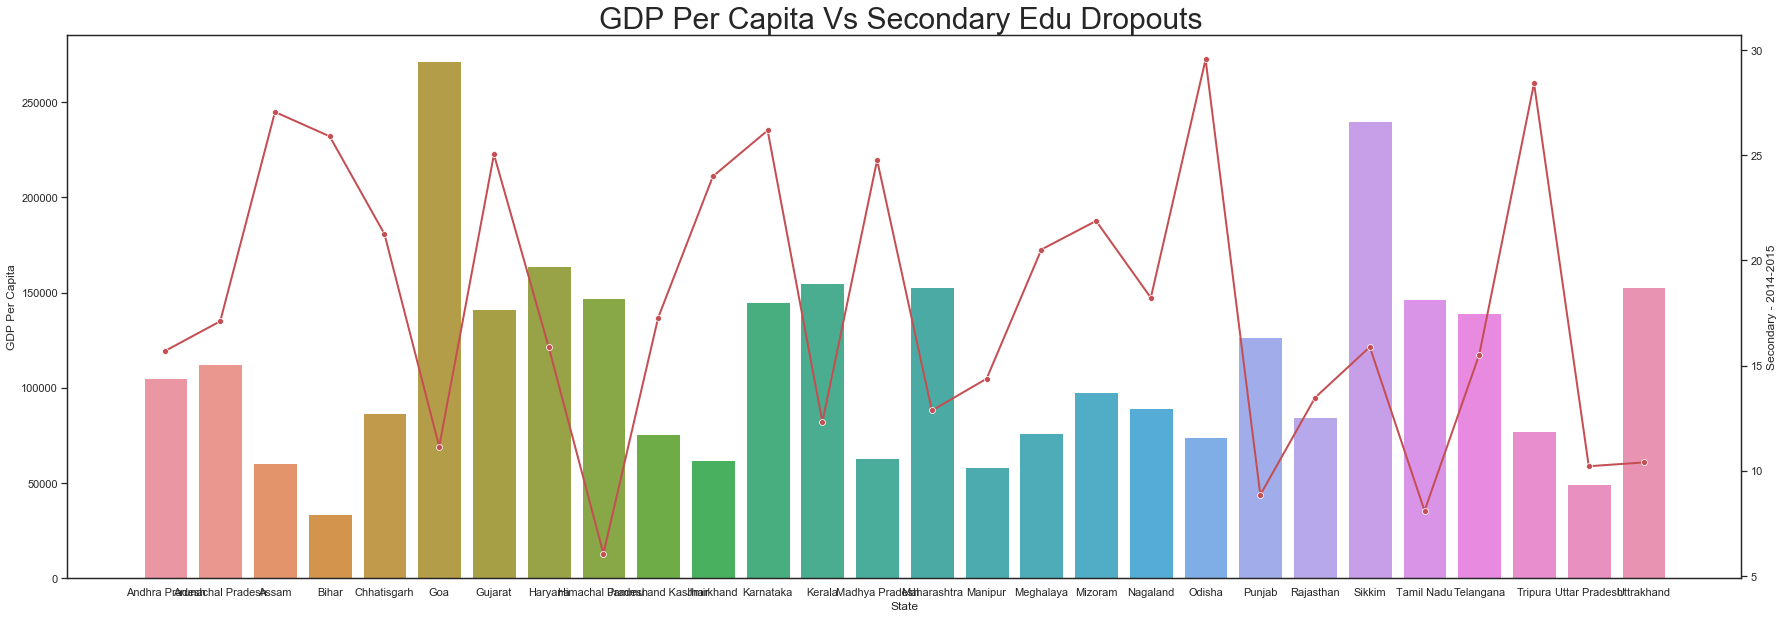

In [56]:
sns.set(style="white", rc={"lines.linewidth": 2})
fig, ax1 = plt.subplots(figsize=(30,10))
ax2 = ax1.twinx()
sns.barplot(x= df_dropouts['State'],
            y= df_dropouts['GDP Per Capita'], 
            ax=ax1)
sns.lineplot(x=df_dropouts['State'], 
             y=df_dropouts['Secondary - 2014-2015'],
             color='r',
             marker="o",
             ax=ax2)
plt.title('GDP Per Capita Vs Secondary Edu Dropouts ',fontsize=30)
plt.xlabel('State',fontsize=25)
plt.show()

# Observation: 

1. It is observed that GDP Per Capita drops drastically for high Primary Education Dropouts. E.g. Assam 

2. When there are less drop outs, good GDP Per Capita was reported. E.g. Gujarat

3. The same case is applicable for Upper Primary and Secondary Education Dropouts.

   E.g. Goa reported high GDP Per Capita with less dropouts

# --------------------------------------End of the Assignment-------------------------------------